<img src="https://www.uss.cl/wp-content/themes/uss/img/logo.svg" width="400">

# Universidad San Sebastián - Magister Data Science

## Machine Learning 
### Métodos **Predictivos**
### Marco Cedeño

En este Notebook se va a realizar la aplicación de los algoritmos de clasificación:


* Árboles de decisión

* Ramdon Forest en predicción

* Support vector regression 

* **Extras**

Cada algoritmo tiene una implementación simple en base a un conjunto de datos pequeño.

## 3. Métodos Predictivos 

Para la clase del día de hoy vamos a trabajar con el data set **diabetes** dentro del API de Sklearn.

<a href="https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html">Diabetes Sklearn</a>

### 3.1 Árboles de decisión

#### 3.1.1 Carga de librerías necesarias

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

#### 3.1.2 Carga del conjunto de datos

In [ ]:
# Cargar el conjunto de datos de diabetes
diabetes = load_diabetes()
X = diabetes.data
y = diabetes.target
print(y[:5])

[151.  75. 141. 206. 135.]


#### 3.1.3 Preprocesamiento de datos

Separación de datos para conjunto de entrenamiento y prueba de manera aleatoria 80-20 %)


In [ ]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


#### 3.1.4 Definición del modelo

In [ ]:
# Definir los hiperparámetros a ajustar
parameters_DT = {'max_depth': [None, 3, 5, 7]}

# Crear el regresor de árbol de decisión
regressor_DT = DecisionTreeRegressor()

# Utilizar GridSearchCV para encontrar los mejores hiperparámetros
grid_search_DT = GridSearchCV(regressor_DT, parameters_DT, scoring='neg_mean_squared_error')
grid_search_DT.fit(X_train, y_train)

# Obtener los mejores hiperparámetros y el modelo ajustado
best_params_DT = grid_search_DT.best_params_
best_regressor_DT = grid_search_DT.best_estimator_


#### 3.1.5 Predicciones y evaluación del modelo

In [ ]:
# Evaluar el desempeño del modelo en el conjunto de prueba
y_pred_DT = best_regressor_DT.predict(X_test)
mse_DT = round(mean_squared_error(y_test, y_pred_DT),1)

# Mostrar el MSE obtenido
print("MSE_DT: ", mse_DT)

MSE_DT:  3552.7


#### 3.1.6 Muestra Gráfica

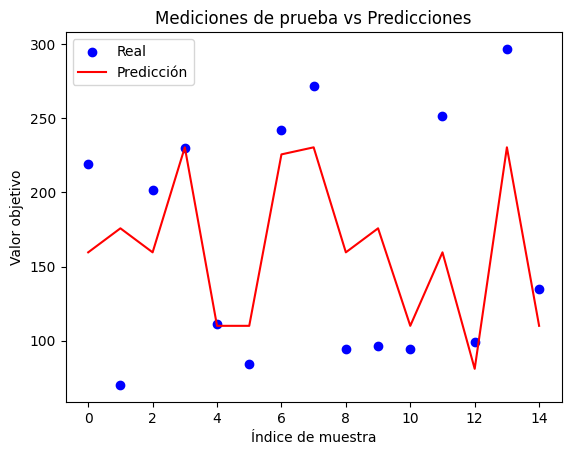

In [ ]:
# Grafica las 15 primeras mediciones de prueba y las predicciones
plt.scatter(range(15), y_test[:15], color='b', label='Real')
plt.plot(range(15), y_pred_DT[:15], color='r', label='Predicción')
plt.xlabel('Índice de muestra')
plt.ylabel('Valor objetivo')
plt.title('Mediciones de prueba vs Predicciones')
plt.legend()
plt.show()

### 3.2 Ramdon Forest en predicción

#### 3.2.1 Carga de librerías necesarias

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error


#### 3.2.2 Carga del conjunto de datos

In [ ]:
# Cargar el conjunto de datos de diabetes
diabetes = load_diabetes()
X = diabetes.data
y = diabetes.target


#### 3.2.3 Preprocesamiento de datos

Separación de datos para conjunto de entrenamiento y prueba de manera aleatoria 80-20 %)


In [ ]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


#### 3.2.4 Definición del modelo

In [ ]:
# Definir los hiperparámetros a ajustar
parameters_RF = {'n_estimators': [10, 50, 100], 'max_depth': [None, 3, 5, 7]}

# Crear el regresor de Random Forest
regressor_RF = RandomForestRegressor()

# Utilizar GridSearchCV para encontrar los mejores hiperparámetros
grid_search_RF = GridSearchCV(regressor_RF, parameters_RF, scoring='neg_mean_squared_error')
grid_search_RF.fit(X_train, y_train)

# Obtener los mejores hiperparámetros y el modelo ajustado
best_params_RF = grid_search_RF.best_params_
best_regressor_RF = grid_search_RF.best_estimator_


#### 3.2.5 Predicciones y evaluación del modelo

In [ ]:
# Evaluar el desempeño del modelo en el conjunto de prueba
y_pred_RF = best_regressor_RF.predict(X_test)
mse_RF = round(mean_squared_error(y_test, y_pred_RF),1)

# Mostrar el MSE obtenido
print("MSE_RF: ", mse_RF)


MSE_RF:  2806.8


#### 3.2.6 Muestra Gráfica

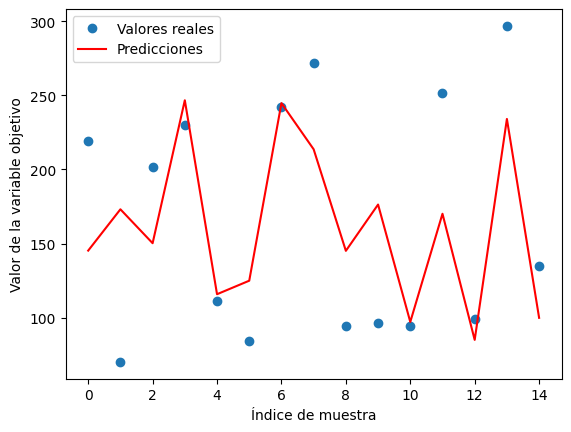

In [ ]:
# Graficar las 15 primeras mediciones de prueba y sus predicciones
plt.plot(y_test[:15], 'o', label='Valores reales')
plt.plot(y_pred_RF[:15], 'r-', label='Predicciones')
plt.xlabel('Índice de muestra')
plt.ylabel('Valor de la variable objetivo')
plt.legend()
plt.show()

### 3.3 Support Vector Regression

#### 3.3.1 Carga de librerías necesarias

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error


#### 3.3.2 Carga del conjunto de datos

In [ ]:
# Cargar el conjunto de datos de diabetes
diabetes = load_diabetes()
X = diabetes.data
y = diabetes.target

#### 3.3.3 Preprocesamiento de datos

Separación de datos para conjunto de entrenamiento y prueba de manera aleatoria 80-20 %)


In [ ]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### 3.3.4 Definición del modelo

In [ ]:
# Definir los hiperparámetros a ajustar
parameters_SVR = {'C': [0.1, 1, 10], 'epsilon': [0.01, 0.1, 1]}

# Crear el regresor SVR
regressor_SVR = SVR()

# Utilizar GridSearchCV para encontrar los mejores hiperparámetros
grid_search_SVR = GridSearchCV(regressor_SVR, parameters_SVR, scoring='neg_mean_squared_error')
grid_search_SVR.fit(X_train, y_train)

# Obtener los mejores hiperparámetros y el modelo ajustado
best_params_SVR = grid_search_SVR.best_params_
best_regressor_SVR = grid_search_SVR.best_estimator_


#### 3.3.5 Predicciones y evaluación del modelo

In [ ]:
# Evaluar el desempeño del modelo en el conjunto de prueba
y_pred_SVR = best_regressor_SVR.predict(X_test)
mse_SVR = round(mean_squared_error(y_test, y_pred_SVR),1)

# Mostrar el MSE obtenido
print("MSE_SVR: ", mse_SVR)

MSE_SVR:  2673.9


#### 3.3.6 Muestra Gráfica

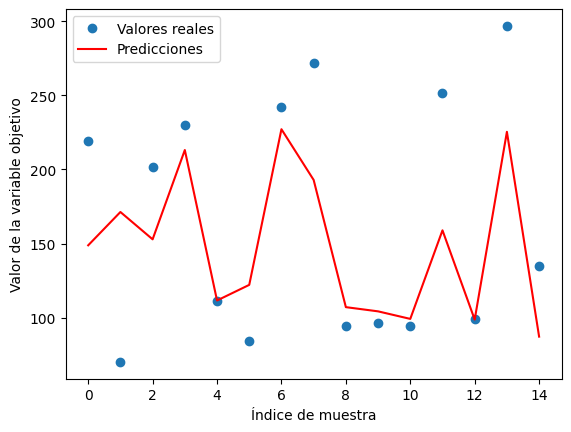

In [ ]:
# Graficar las 15 primeras mediciones de prueba y sus predicciones
plt.plot(y_test[:15], 'o', label='Valores reales')
plt.plot(y_pred_SVR[:15], 'r-', label='Predicciones')
plt.xlabel('Índice de muestra')
plt.ylabel('Valor de la variable objetivo')
plt.legend()
plt.show()

Comparación entre los distintos modelos de regresión

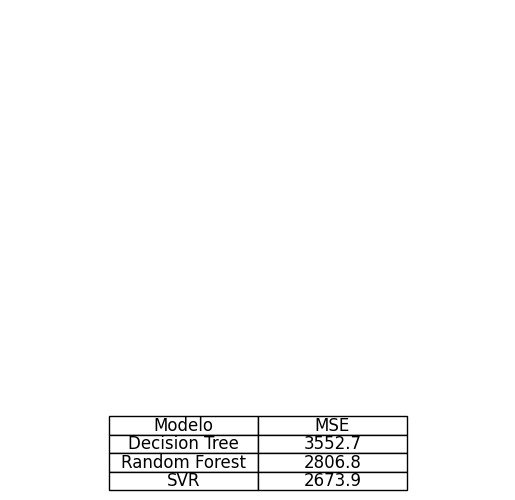

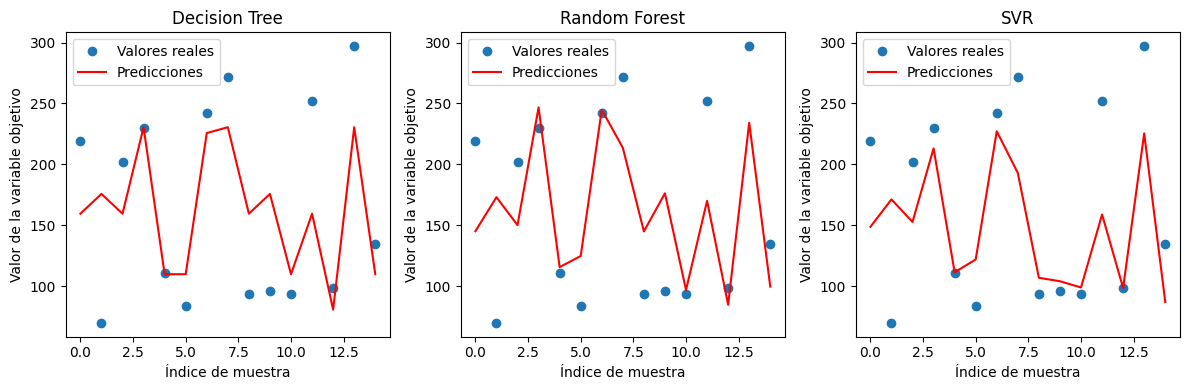

In [ ]:
# Mostrar los MSE obtenidos para cada modelo
mse_values = {'Modelo': ['Decision Tree', 'Random Forest', 'SVR'],
              'MSE': [mse_DT, mse_RF, mse_SVR]}

table_data = list(zip(mse_values['Modelo'], mse_values['MSE']))

table = plt.table(cellText=table_data,
                  colLabels=['Modelo', 'MSE'],
                  cellLoc='center',
                  loc='center',
                  bbox=[0.2, -0.3, 0.6, 0.2])

table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1.2, 1.2)

plt.axis('off')

# Graficar las 15 primeras mediciones de prueba y sus predicciones para cada modelo
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.plot(y_test[:15], 'o', label='Valores reales')
plt.plot(y_pred_DT[:15], 'r-', label='Predicciones')
plt.xlabel('Índice de muestra')
plt.ylabel('Valor de la variable objetivo')
plt.title('Decision Tree')
plt.legend()

plt.subplot(1, 3, 2)
plt.plot(y_test[:15], 'o', label='Valores reales')
plt.plot(y_pred_RF[:15], 'r-', label='Predicciones')
plt.xlabel('Índice de muestra')
plt.ylabel('Valor de la variable objetivo')
plt.title('Random Forest')
plt.legend()

plt.subplot(1, 3, 3)
plt.plot(y_test[:15], 'o', label='Valores reales')
plt.plot(y_pred_SVR[:15], 'r-', label='Predicciones')
plt.xlabel('Índice de muestra')
plt.ylabel('Valor de la variable objetivo')
plt.title('SVR')
plt.legend()

plt.tight_layout()
plt.show()

### **¿Cómo sería la implementación de XGBOOST para este mismo ejemplo? Compare las gráficas anteriores y sus valores MSE**

{'learning_rate': 0.09, 'max_depth': 1, 'n_estimators': 150}


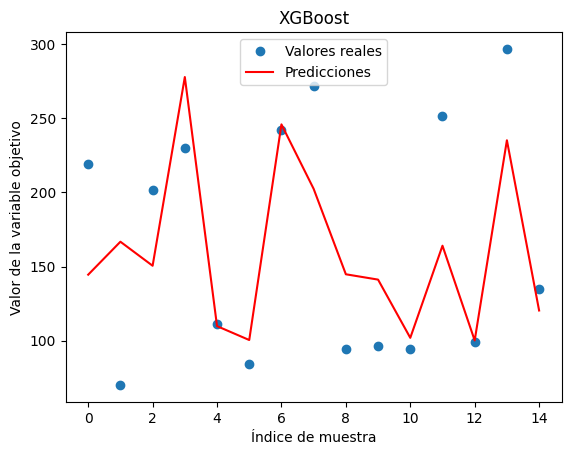

MSE de XGBoost: 2750.2


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error
import xgboost as xgb

# Cargar el conjunto de datos de diabetes
diabetes = load_diabetes()
X = diabetes.data
y = diabetes.target

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Definir los hiperparámetros a ajustar para XGBoost
parameters_xgb = {'max_depth': [None, 1,2],
                  'learning_rate': [1,0.9,0.8,0.7,0.6,0.5,0.4,0.3,0.2,0.1,0.99,0.09,0.08,0.07,0.06],
                  'n_estimators': [150, 200,250,350]}

# Crear el regresor de XGBoost
regressor_xgb = xgb.XGBRegressor()

# Utilizar GridSearchCV para encontrar los mejores hiperparámetros para XGBoost
grid_search_xgb = GridSearchCV(regressor_xgb, parameters_xgb, scoring='neg_mean_squared_error')
grid_search_xgb.fit(X_train, y_train)

# Obtener los mejores hiperparámetros y el modelo ajustado para XGBoost
best_params_xgb = grid_search_xgb.best_params_
print(best_params_xgb)
best_regressor_xgb = grid_search_xgb.best_estimator_

# Evaluar el desempeño del modelo de XGBoost en el conjunto de prueba
y_pred_xgb = best_regressor_xgb.predict(X_test)
mse_xgb = round(mean_squared_error(y_test, y_pred_xgb),1)

# Graficar las 15 primeras mediciones de prueba y sus predicciones
plt.plot(y_test[:15], 'o', label='Valores reales')
plt.plot(y_pred_xgb[:15], 'r-', label='Predicciones')
plt.xlabel('Índice de muestra')
plt.ylabel('Valor de la variable objetivo')
plt.title('XGBoost')
plt.legend()
plt.show()

# Imprimir el MSE obtenido para XGBoost
print("MSE de XGBoost:", mse_xgb)


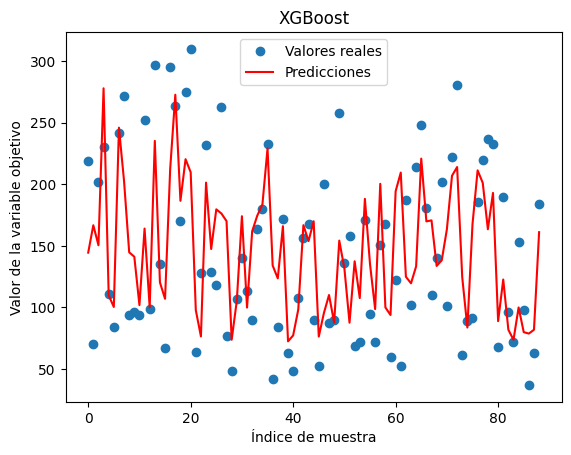

In [2]:
# Graficar las 15 primeras mediciones de prueba y sus predicciones
plt.plot(y_test[:150], 'o', label='Valores reales')
plt.plot(y_pred_xgb[:150], 'r-', label='Predicciones')
plt.xlabel('Índice de muestra')
plt.ylabel('Valor de la variable objetivo')
plt.title('XGBoost')
plt.legend()
plt.show()